Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2945 - accuracy: 0.9120 - val_loss: 0.1521 - val_accuracy: 0.9572
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1672 - accuracy: 0.9535 - val_loss: 0.1181 - val_accuracy: 0.9679
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1389 - accuracy: 0.9640 - val_loss: 0.1271 - val_accuracy: 0.9684
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1263 - accuracy: 0.9671 - val_loss: 0.1112 - val_accuracy: 0.9744
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1192 - accuracy: 0.9707 - val_loss: 0.1195 - val_accuracy: 0.9724
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1106 - accuracy: 0.9734 - val_loss: 0.1089 - val_accuracy: 0.9760
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1064 - accuracy: 0.9743 - val_loss: 0.1146 - val_accuracy:

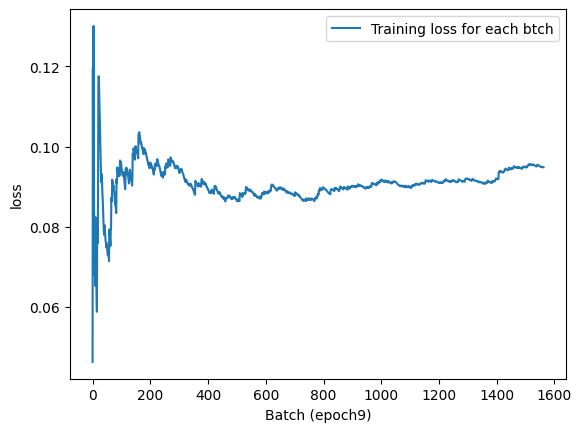

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28*28)).astype("float32")/255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

from matplotlib import pyplot as plt
class  LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
            label="Training loss for each btch")
        plt.xlabel(f"Batch (epoch{epoch})")
        plt.ylabel("loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)
model.fit(train_images, train_labels,
         epochs=10,
          callbacks=[LossHistory()],
         validation_data=(val_images, val_labels))